In [ ]:
# based on hw0 from http://web.stanford.edu/class/cs224w/

In [1]:
import snap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

### Part 1

In [2]:
filename = "./wiki-Vote.txt"

def read_graph(filename, skip=0):
    edges = []
    nodes = set()
    with open(filename, "r") as fh:
        for idx, line in enumerate(fh):
            if idx < skip:
                continue
            frm, to = [int(it) for it in line.split()]
            edges.append((frm, to))
            nodes.add(frm)
            nodes.add(to)
    nodes = list(nodes)
    return nodes, edges

In [3]:
nodes, edges = read_graph(filename, skip=4)

In [4]:
def build_graph(nodes, edges):
    g = snap.TNGraph.New()

    for n in nodes:
        g.AddNode(n)

    for e in edges:
        g.AddEdge(*e)
    return g

In [5]:
g = build_graph(nodes, edges)

In [6]:
print(f"N nodes: {len(nodes)}")

N nodes: 7115


In [7]:
print("Self edges count: {}".format(snap.CntSelfEdges(g)))

Self edges count: 0


In [8]:
print("N direct edges: {}".format(snap.CntUniqDirEdges(g)))

N direct edges: 103689


In [9]:
print("N undirected edges: {}".format(snap.CntUniqUndirEdges(g)))

N undirected edges: 100762


In [10]:
print("N reciprocated edges: {}".format(snap.CntUniqBiDirEdges(g)))

N reciprocated edges: 2927


In [11]:
print("Nodes with 0 out degree: {}".format(snap.CntOutDegNodes(g, 0)))

Nodes with 0 out degree: 1005


In [12]:
print("Nodes with 0 in degree: {}".format(snap.CntInDegNodes(g, 0)))

Nodes with 0 in degree: 4734


In [13]:
def cnt_out_degree_nodes(g, n):
    out_degree_hist = snap.TIntPrV()
    snap.GetOutDegCnt(g, out_degree_hist)
    ans = 0
    for it in out_degree_hist:
        if it.GetVal1() > n:
            ans += it.GetVal2()
    return ans

print("Nodes with out degree > 10: {}".format(cnt_out_degree_nodes(g, 10)))

Nodes with out degree > 10: 1612


In [14]:
def cnt_in_degree_nodes(g, n):
    in_degree_hist = snap.TIntPrV()
    snap.GetInDegCnt(g, in_degree_hist)
    ans = 0
    for it in in_degree_hist:
        if it.GetVal1() < n:
            ans += it.GetVal2()
    return ans

print("Nodes with out degree < 10: {}".format(cnt_in_degree_nodes(g, 10)))

Nodes with out degree < 10: 5165


### Part 2

In [15]:
deg_to_cnt_v = snap.TIntPrV()
snap.GetOutDegCnt(g, deg_to_cnt_v)

plot_data_y = []
plot_data_x = []
for item in deg_to_cnt_v:
    plot_data_x.append(item.GetVal1())
    plot_data_y.append(item.GetVal2())

plot_data_y = np.array(plot_data_y)
plot_data_x = np.array(plot_data_x)

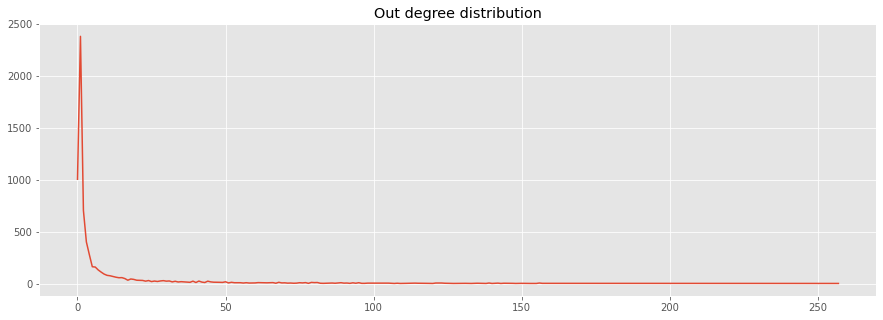

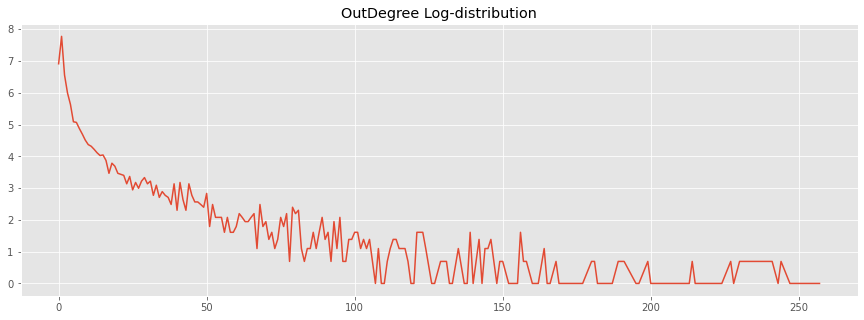

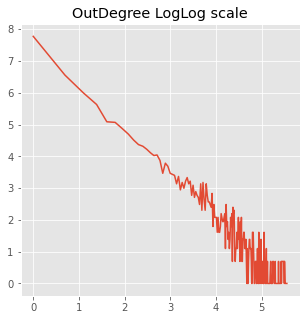

In [16]:
x_max = 200

plt.figure(figsize=(15,5))
plt.plot(plot_data_x[:x_max], plot_data_y[:x_max])
plt.title('Out degree distribution')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(plot_data_x[:x_max], np.log(plot_data_y[:x_max]))
plt.title('OutDegree Log-distribution');

plt.figure(figsize=(5,5))
plt.plot(np.log(plot_data_x[1:x_max]), np.log(plot_data_y[1:x_max]))
plt.title('OutDegree LogLog scale');

Text(0.5, 1.0, 'Linear approcsimation of log-log out-degree distribution')

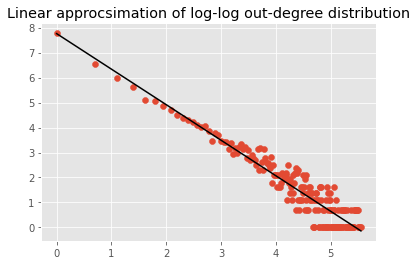

In [17]:
log_x = np.log(plot_data_x[1:x_max])
log_y = np.log(plot_data_y[1:x_max])

slope, intercept = np.polyfit(log_x, log_y, 1)

plt.plot(log_x, slope*log_x + intercept, color="black")
plt.scatter(log_x, log_y)
plt.title("Linear approcsimation of log-log out-degree distribution")

### Part 3

In [18]:
filename = './stackoverflow-Java.txt'
nodes, edges = read_graph(filename)
g = build_graph(nodes, edges)

In [19]:
components = snap.TCnComV()
snap.GetWccs(g, components)
print('Number of weekly connected components: {}'.format(len(components)))

Number of weekly connected components: 10143


In [20]:
mx_wcc = snap.GetMxWcc(g)
print('Larges weekly connected component:\n'
      f'nodes: {format(mx_wcc.GetNodes())}\n'
      f'edges: {format(mx_wcc.GetEdges())}'
     )

Larges weekly connected component:
nodes: 131188
edges: 322486


In [21]:
def collect_top_items(data, n=3):
    scored_items = []
    for item in data:
        scored_items.append((data[item], item))
    scored_items = list(sorted(scored_items, reverse=True))
    top_items = [idx for _, idx in scored_items[:n]]
    return top_items

In [22]:
pr = snap.TIntFltH()
snap.GetPageRank(g, pr)

central_nodes = collect_top_items(pr)
print(f'Central graph nodes are: {central_nodes}')

Central graph nodes are: [992484, 135152, 22656]


In [23]:
hubs = snap.TIntFltH()
auth = snap.TIntFltH()
snap.GetHits(g, hubs, auth)

top_hubs = collect_top_items(hubs)
top_auth = collect_top_items(auth)

print(f'Top hubs are: {top_hubs}')
print(f'Top authorities are: {top_auth}')

Top hubs are: [892029, 1194415, 359862]
Top authorities are: [22656, 157882, 571407]
